## Import packages and set the working directory



In [ ]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Colab Notebooks/WildFire/Files")


## Use glob to match the pattern ‘csv’

Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable.

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

## Combine all files in the list and export as CSV

Use pandas to concatenate all files in the list and export as CSV.

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_viirs.csv", index=False, encoding='utf-8-sig')


## View Dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WildFire/Files/combined_viirs.csv")

In [ ]:
dataset.shape

(4001030, 15)

In [ ]:
dataset.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,-34.04053,18.63838,367.00,0.43,0.62,01 01 2020,1144,N,VIIRS,h,2,298.95,25.80,D,0
1,-34.04639,18.63877,342.89,0.43,0.62,01 01 2020,1144,N,VIIRS,n,2,300.94,4.98,D,0
2,-33.70105,25.50861,336.48,0.54,0.42,01 01 2020,1144,N,VIIRS,n,2,303.86,3.16,D,0
3,-34.00828,22.46679,348.13,0.53,0.50,01 01 2020,1144,N,VIIRS,n,2,300.06,5.46,D,0
4,-34.04079,18.63348,337.73,0.43,0.62,01 01 2020,1144,N,VIIRS,n,2,299.76,12.98,D,0


In [ ]:
dataset.tail()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
4001025,-30.65872,28.28868,295.27,0.33,0.55,31 12 2022,2233,N,VIIRS,n,2,282.87,0.17,N,0
4001026,-33.87200,25.50732,299.38,0.39,0.59,31 12 2022,2234,N,VIIRS,n,2,287.74,0.16,N,0
4001027,-33.96648,25.28557,301.78,0.40,0.60,31 12 2022,2234,N,VIIRS,n,2,287.27,0.64,N,0
4001028,-33.96753,25.28959,299.63,0.40,0.60,31 12 2022,2234,N,VIIRS,n,2,287.39,0.64,N,0
4001029,-34.18235,24.81842,300.01,0.41,0.61,31 12 2022,2234,N,VIIRS,n,2,288.21,0.61,N,0


In [ ]:
dataset.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,version,bright_ti5,frp,type
count,4.001030e+06,4.001030e+06,4.001030e+06,4.001030e+06,4.001030e+06,4.001030e+06,4001030.0,4.001030e+06,4.001030e+06,4.001030e+06
mean,-2.750841e+01,2.836695e+01,3.301545e+02,4.661192e-01,4.943091e-01,1.552588e+03,2.0,2.955541e+02,1.031608e+01,2.455043e-01
std,2.543713e+00,2.733082e+00,2.085613e+01,9.373696e-02,1.203767e-01,6.039524e+02,0.0,1.253942e+01,2.212704e+01,6.683223e-01
min,-3.480227e+01,1.649662e+01,2.080000e+02,3.200000e-01,3.600000e-01,0.000000e+00,2.0,2.348100e+02,-1.180000e+00,0.000000e+00
25%,-2.908118e+01,2.738892e+01,3.099000e+02,4.000000e-01,3.800000e-01,1.140000e+03,2.0,2.857400e+02,1.860000e+00,0.000000e+00
50%,-2.681081e+01,2.915131e+01,3.338400e+02,4.400000e-01,4.600000e-01,1.224000e+03,2.0,2.956500e+02,4.360000e+00,0.000000e+00
75%,-2.568651e+01,3.018473e+01,3.445200e+02,5.200000e-01,5.800000e-01,2.250000e+03,2.0,3.039000e+02,9.500000e+00,0.000000e+00
max,-2.213072e+01,3.289017e+01,3.670000e+02,8.000000e-01,7.800000e-01,2.359000e+03,2.0,3.868600e+02,1.563470e+03,3.000000e+00


In [ ]:
dataset.dtypes

,0
latitude,float64
longitude,float64
bright_ti4,float64
scan,float64
track,float64
acq_date,object
acq_time,int64
satellite,object
instrument,object
confidence,object


In [ ]:
# make a copy
data = dataset

In [ ]:
#check on missing values
data.isna().sum()

,0
latitude,0
longitude,0
bright_ti4,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [ ]:
pip install geodatasets

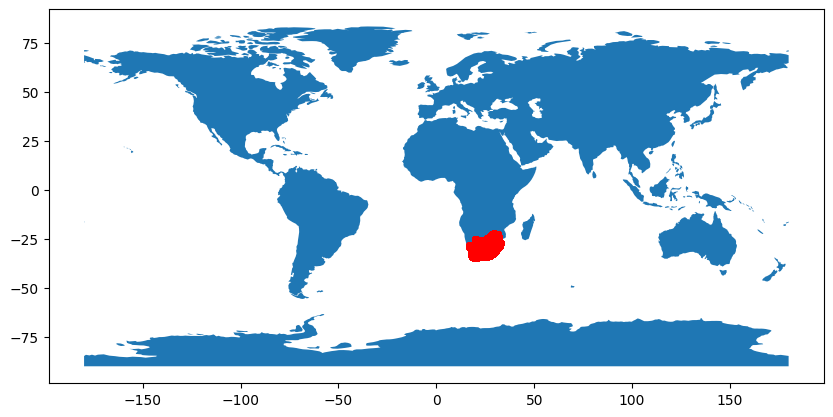

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WildFire/Files/combined_viirs.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
# split date to day, month and year
data[["Day","Month","Year",]] = data["acq_date"].str.split(" ", expand = True)

In [ ]:
# data types of all attributes
#data.dtypes

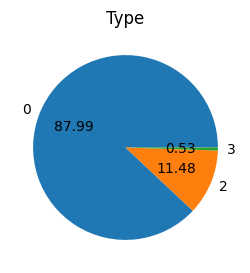

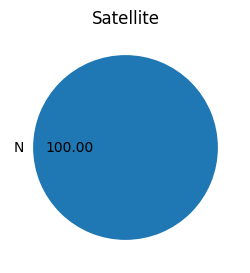

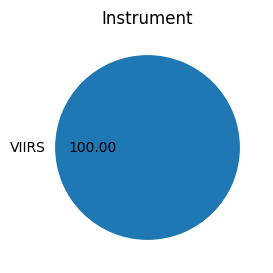

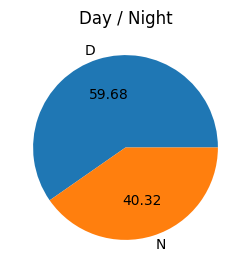

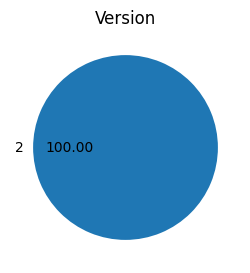

In [ ]:
# plotting pie charts for all categorical columns
import matplotlib.pyplot as plt
plt.figure(0)
plt.title("Type")
data.groupby('type').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(1)
plt.title("Satellite")
data.groupby('satellite').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(2)
plt.title("Instrument")
data.groupby('instrument').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(3)
plt.title("Day / Night")
data.groupby('daynight').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(4)
plt.title("Version")
data.groupby('version').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.show() #show all figures



The following facts are observed from the pie charts above:

* There is a higher proportion of ‘Type 0’ (87.99%) than ‘Type 2’ and ‘Type 3’.
* Most fire disasters are taking place during the day





## Data Cleaning and Processing¶

The following library has been utilized for data processing:

* pandas: It is an open-source Python module, having a wide scope of use in the field of computing, data analysis, statistics, etc. The following techniques have been implemented for Data Processing:

* Data Type conversions
* Label Encoding
* Feature Scaling





Data type conversions:

During the course of the project, the dataset undergoes many executions and model fittings. For this reason, it is better to ensure that the attributes can be fit enough to process well without any later trouble of data type exception errors. With having attributes under the same data type, it will be easier during analysis and model fitting procedures. The attributes are currently in the form of numerical and object forms and further will be converted into numerical(integer) form.


In [ ]:
# drop instrument column
data = data.drop(['instrument'], axis = 1)
# converting categorical attributes to our target data type form
data["version"]= data["version"].astype(str)
data["Year"]= data["Year"].astype(int)
data["Month"]= data["Month"].astype(int)
data["Day"]= data["Day"].astype(int)
# add leading zeroes to time and convert
data['acq_time']=data['acq_time'].apply(lambda x: '{0:0>4}'.format(x))
data["acq_time"]= data["acq_time"].astype(int)



## Transformation of object columns by label encoding

Label encoding refers to the technique of transforming categorical objects into numerical form so that the models can understand how to run on them. This technique requires importing a preprocessing package from sklearn. In this case, the attributes: ‘satellite’, ‘daynight’, confidence and ‘version’ undergo label encoding. The technique will result in the transformation of all these attributes into numerical form.


In [ ]:
# convert object columns to numrical columns through encoding
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['satellite']=l.fit_transform(data['satellite'])
data['daynight']=l.fit_transform(data['daynight'])
data['version']=l.fit_transform(data['version'])
data['confidence']=l.fit_transform(data['confidence'])
data["version"]= data["version"].astype(int)

In [ ]:
# final check on the data types - converted to numerical form
data.dtypes

,0
latitude,float64
longitude,float64
bright_ti4,float64
scan,float64
track,float64
acq_date,object
acq_time,int64
satellite,int64
confidence,int64
version,int64




## Feature Scaling

Feature Scaling refers to the technique of converting the numeric data into a standard range to improvise the performance of algorithms. This is obtained by normalizing or standardizing the data values. One of the most common feature-scaling techniques is min-max scaling which will be implemented here.

Min-max scaling is a feature scaling technique that involves the subtraction of the minimum value in the attribute with each observation and then dividing this by the range of the attribute.

Here, attributes: ‘bright_ti4’, ‘bright_ti5’, and ‘frp’ undergo min-max scaling. The technique will result in the transformation of all these attributes into normalized numerical form in the range of 0 to 1.


In [ ]:
# min max feature scaling - optimize the data
def minmax(column):
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

minmax('bright_ti5')
minmax('bright_ti4')
minmax('frp')

Let's us take a look of the formatted data

In [ ]:
data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,type,Day,Month,Year
0,-34.04053,18.63838,1.000000,0.43,0.62,01 01 2020,1144,0,0,0,0.421835,0.017243,0,0,1,1,2020
1,-34.04639,18.63877,0.848365,0.43,0.62,01 01 2020,1144,0,2,0,0.434923,0.003937,0,0,1,1,2020
2,-33.70105,25.50861,0.808050,0.54,0.42,01 01 2020,1144,0,2,0,0.454127,0.002774,0,0,1,1,2020
3,-34.00828,22.46679,0.881321,0.53,0.50,01 01 2020,1144,0,2,0,0.429135,0.004244,0,0,1,1,2020
4,-34.04079,18.63348,0.815912,0.43,0.62,01 01 2020,1144,0,2,0,0.427162,0.009050,0,0,1,1,2020




## Prediction Model - Logistic Regression

The following libraries are imported to build the model:

* sklearn.linear model for Logistic Regression
* sklearn.metrics for classification report and confusion matrix


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data = data.drop(['acq_date'], axis = 1)


In [ ]:
# #dataset
# X = data.drop(['type'], axis = 1)
# y = data['type']

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [ ]:
train_data = data.dropna()
test_data = data.dropna()
x_train = train_data.drop(['type'], axis = 1)
y_train = train_data['type']
x_test = test_data.drop(['type'], axis = 1)
y_test = test_data['type']

In [ ]:
# fitting data into the model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
import pickle

In [ ]:
# save the model
filename = 'fire_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
# accuracy of our model
model.score(x_train, y_train)

0.888396237968723

The prediction model has been successfully built. Now, to the main step, i.e. predicting the missing values. Here, the model will predict using ‘X_test’ data to give out respective predictions for all observations and store them under a new attribute named ‘y_pred’.

In [ ]:
# probability of target variable being type 0,2 or 3
model.predict_proba(x_test)

array([[0.98720159, 0.01128024, 0.00151817],
       [0.97460655, 0.02268637, 0.00270708],
       [0.98323992, 0.01573736, 0.00102272],
       ...,
       [0.98295757, 0.01454164, 0.00250079],
       [0.98278914, 0.01470318, 0.00250768],
       [0.98324548, 0.01417105, 0.00258347]])

In [ ]:
# replacing the missing values with predicted values
y_pred = model.predict(x_test)
# convert to fit to df form
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
4001025,0
4001026,0
4001027,0
4001028,0


The predicted values can be seen above for all the observations whose values have been missing in the beginning. Now the values of ‘y_pred’ are replaced with ‘y_test’ and combine training and final testing data. This will result in a complete dataset.

In [ ]:
test_data['type'] = y_pred.values

In [ ]:
test_data

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,type,Day,Month,Year
0,-34.04053,18.63838,1.000000,0.43,0.62,1144,0,0,0,0.421835,0.017243,0,0,1,1,2020
1,-34.04639,18.63877,0.848365,0.43,0.62,1144,0,2,0,0.434923,0.003937,0,0,1,1,2020
2,-33.70105,25.50861,0.808050,0.54,0.42,1144,0,2,0,0.454127,0.002774,0,0,1,1,2020
3,-34.00828,22.46679,0.881321,0.53,0.50,1144,0,2,0,0.429135,0.004244,0,0,1,1,2020
4,-34.04079,18.63348,0.815912,0.43,0.62,1144,0,2,0,0.427162,0.009050,0,0,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001025,-30.65872,28.28868,0.548868,0.33,0.55,2233,0,2,0,0.316080,0.000863,1,0,31,12,2022
4001026,-33.87200,25.50732,0.574717,0.39,0.59,2234,0,2,0,0.348109,0.000856,1,0,31,12,2022
4001027,-33.96648,25.28557,0.589811,0.40,0.60,2234,0,2,0,0.345018,0.001163,1,0,31,12,2022
4001028,-33.96753,25.28959,0.576289,0.40,0.60,2234,0,2,0,0.345807,0.001163,1,0,31,12,2022


In [ ]:
test_data['type'].value_counts()

,count
type,
0,3865505
2,135525


Complete Dataset

In [ ]:
# merge train and test datasets
datasets = [train_data, test_data]
dataset = pd.concat(datasets)
dataset.dropna()
dataset

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,type,Day,Month,Year
0,-34.04053,18.63838,1.000000,0.43,0.62,1144,0,0,0,0.421835,0.017243,0,0,1,1,2020
1,-34.04639,18.63877,0.848365,0.43,0.62,1144,0,2,0,0.434923,0.003937,0,0,1,1,2020
2,-33.70105,25.50861,0.808050,0.54,0.42,1144,0,2,0,0.454127,0.002774,0,0,1,1,2020
3,-34.00828,22.46679,0.881321,0.53,0.50,1144,0,2,0,0.429135,0.004244,0,0,1,1,2020
4,-34.04079,18.63348,0.815912,0.43,0.62,1144,0,2,0,0.427162,0.009050,0,0,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001025,-30.65872,28.28868,0.548868,0.33,0.55,2233,0,2,0,0.316080,0.000863,1,0,31,12,2022
4001026,-33.87200,25.50732,0.574717,0.39,0.59,2234,0,2,0,0.348109,0.000856,1,0,31,12,2022
4001027,-33.96648,25.28557,0.589811,0.40,0.60,2234,0,2,0,0.345018,0.001163,1,0,31,12,2022
4001028,-33.96753,25.28959,0.576289,0.40,0.60,2234,0,2,0,0.345807,0.001163,1,0,31,12,2022


In [ ]:


dataset.dtypes



,0
latitude,float64
longitude,float64
bright_ti4,float64
scan,float64
track,float64
acq_time,float64
satellite,float64
confidence,float64
version,float64
bright_ti5,float64


In [ ]:
# final check on missing values
dataset.isna().sum()

,0
latitude,800206
longitude,800206
bright_ti4,800206
scan,800206
track,800206
acq_time,800206
satellite,800206
confidence,800206
version,800206
bright_ti5,800206




Hence, we have filling in our missing values with the help pf our prdiction model. Lets us go ahead to the next section, i.e analysis.


Analysis

In [ ]:
dataset.describe()



Plotting of locations in SA that have been affected by forest fires:


<Axes: xlabel='longitude', ylabel='latitude'>

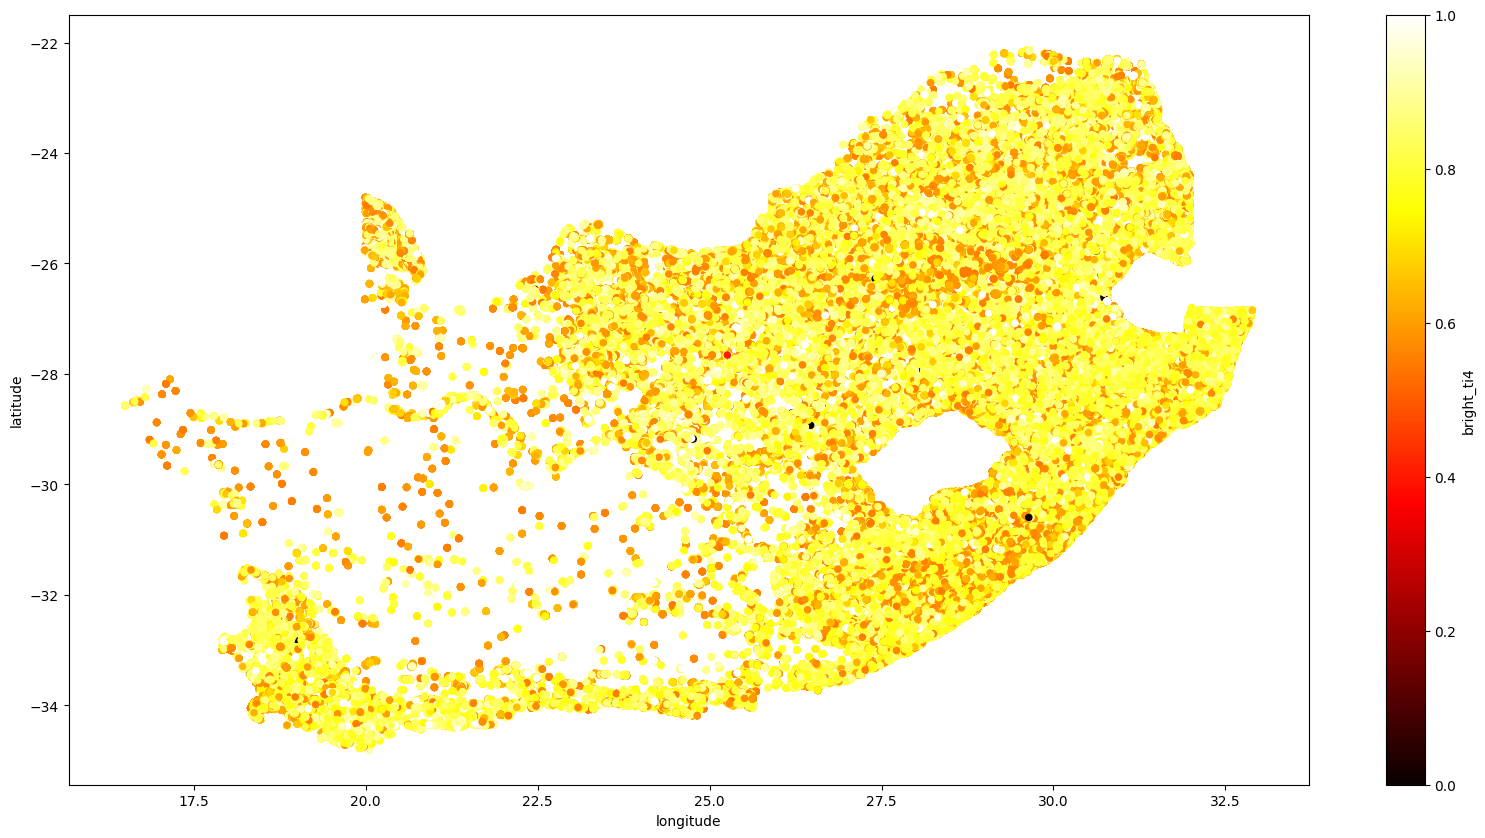

In [ ]:
# loacation ploatting of all observations

dataset.plot(x="longitude", y="latitude", kind="scatter", c="bright_ti4", colormap="hot",figsize=(20, 10))



The figure above depicts that fires seem to occur in most of the parts of the country having the highest concentration at the lower regions.

Density plot during the day and night:

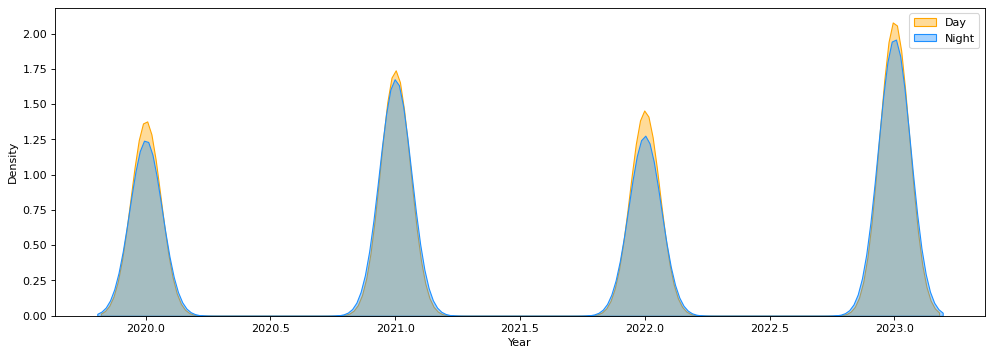

In [ ]:
# density plot during the day and night
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi= 80)
sns.kdeplot(train_data.loc[train_data['daynight'] == 0, "Year"], fill=True, color="orange", label="Day", alpha=.4, warn_singular=False)
sns.kdeplot(train_data.loc[train_data['daynight'] == 1, "Year"], fill=True, color="dodgerblue", label="Night", alpha=.4, warn_singular=False)
plt.legend()
plt.show()



The above plot depicts that there is a higher occurrence during the day in most of the years.




Forest Fire Intensity in Monthly Trends:


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


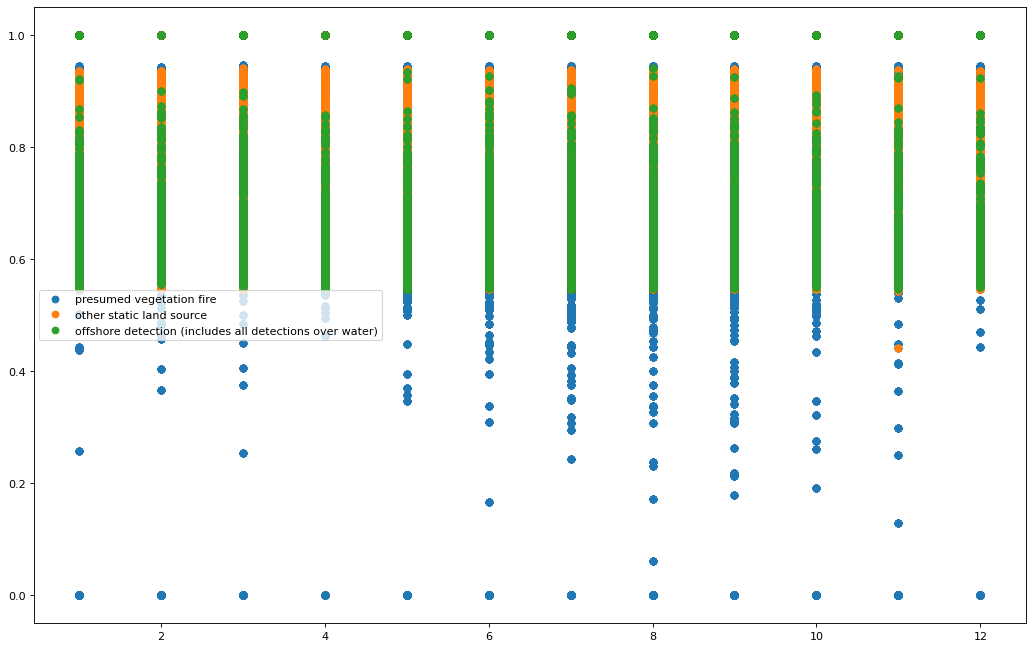

In [ ]:
groups = dataset.groupby("type")
plt.figure(figsize=(16, 10), dpi= 80)
for name, group in groups:
    plt.plot(group["Month"], group["bright_ti4"], marker="o", linestyle="", label=name)
plt.legend(['presumed vegetation fire', 'other static land source', 'offshore detection (includes all detections over water)'])



The above plot shows that the highly effective forest fires are taking place in the months of July to August and the highest occurrences of‘ Type 3’ forest fires are observed in these months.


Correlation Heatmap to study the interdependence among all attributes:

In [ ]:
dataset = dataset.drop(['satellite'], axis = 1)
dataset = dataset.drop(['version'], axis = 1)


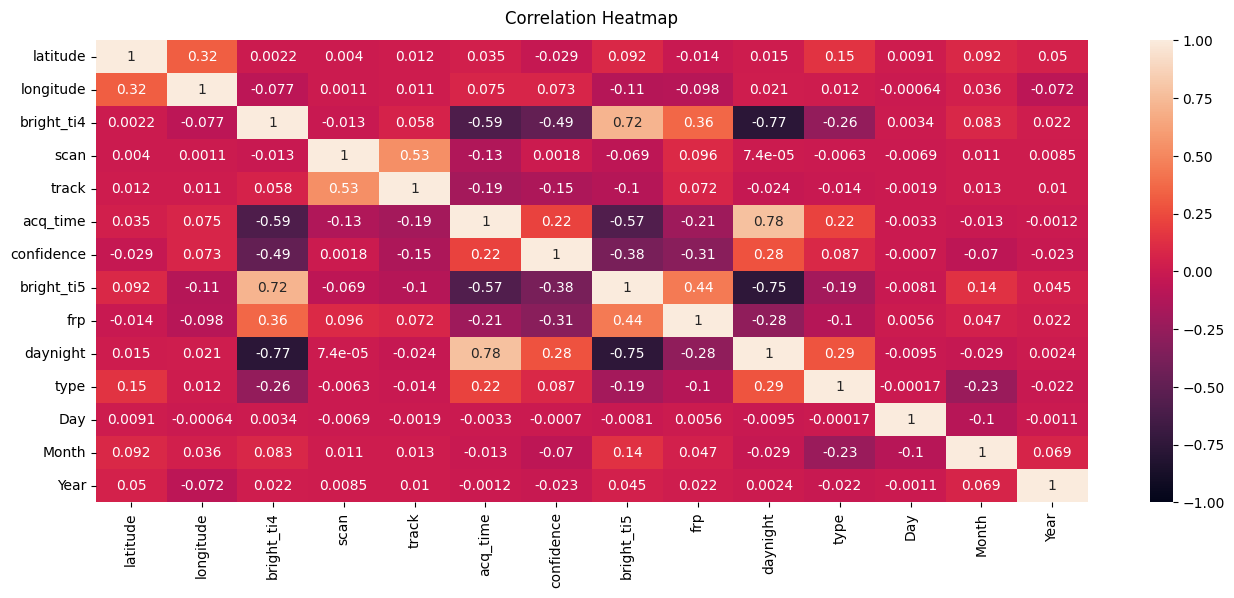

In [ ]:
# correlation analysis
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



From the above heatmap, the following factors are concluded:

* The bright fire seems to be negatively correlated to Day and Night observations.
* ‘Brightness’ is positively correlated to ‘confidence’ and ‘frp’
* ‘Scan’ and ‘Track’ are strongly positively correlated.

